In [15]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Step 2: Load the Dataset
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/delhiaqi.csv')

# Display the first few rows
df.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [17]:
# Step 3: Data Preprocessing

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month for seasonal analysis
df['month'] = df['date'].dt.month

# Check for missing values
print(df.isnull().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
month    0
dtype: int64


In [18]:
df.describe()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,month
count,561,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.0
mean,2023-01-12 16:00:00,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062,1.0
min,2023-01-01 00:00:00,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000,1.0
25%,2023-01-06 20:00:00,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000,1.0
50%,2023-01-12 16:00:00,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000,1.0
75%,2023-01-18 12:00:00,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000,1.0
max,2023-01-24 08:00:00,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000,1.0
std,NaN,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094,0.0


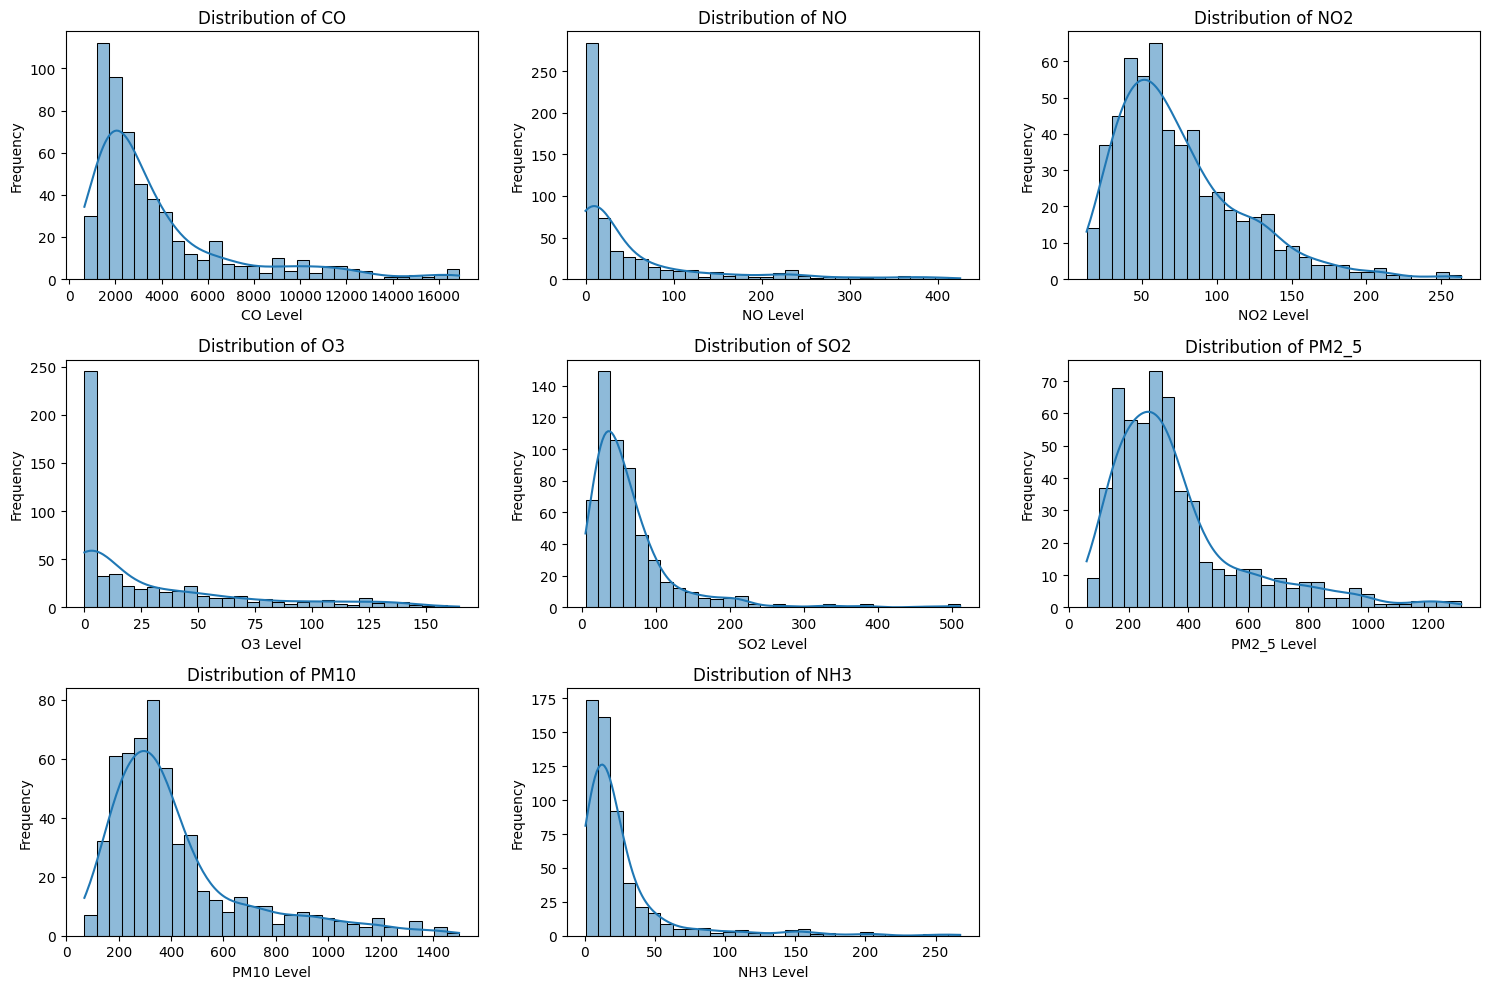

In [19]:
# Step 5: Visualize Pollutant Distributions

# List of pollutant columns
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Plot distributions
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[pollutant], kde=True, bins=30)
    plt.title(f'Distribution of {pollutant.upper()}')
    plt.xlabel(f'{pollutant.upper()} Level')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

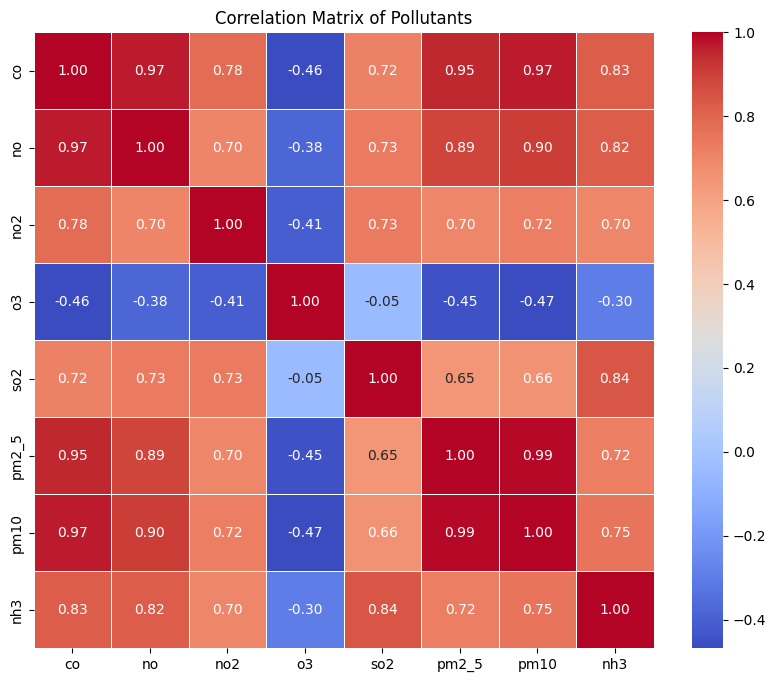

In [20]:
# Step 6: Correlation Matrix

# Compute correlation matrix
correlation_matrix = df[pollutants].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Pollutants')
plt.show()

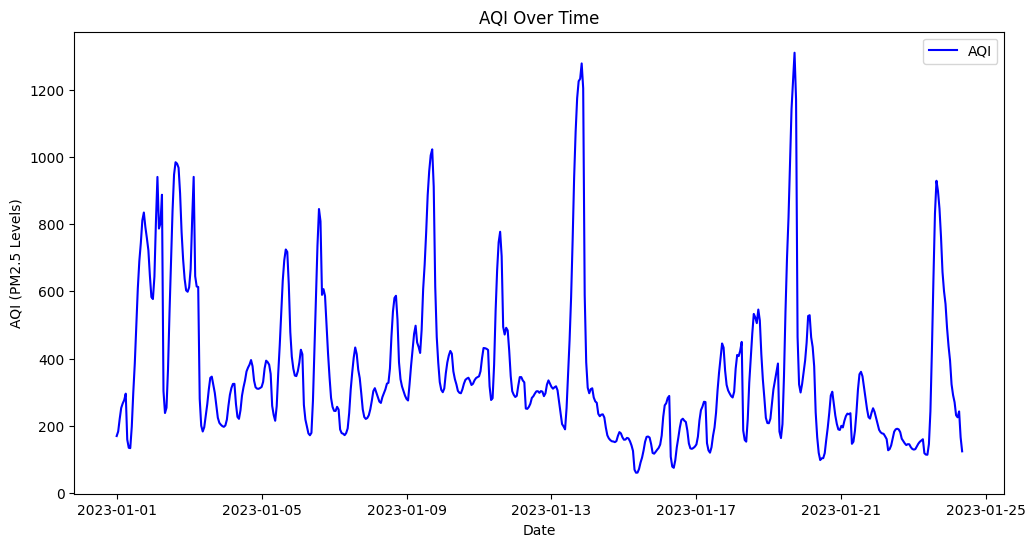

In [21]:
# Step 7: Time Series Analysis

# Create a simple AQI column (e.g., based on PM2.5)
df['aqi'] = df['pm2_5']

# Plot AQI over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['aqi'], color='blue', label='AQI')
plt.xlabel('Date')
plt.ylabel('AQI (PM2.5 Levels)')
plt.title('AQI Over Time')
plt.legend()
plt.show()

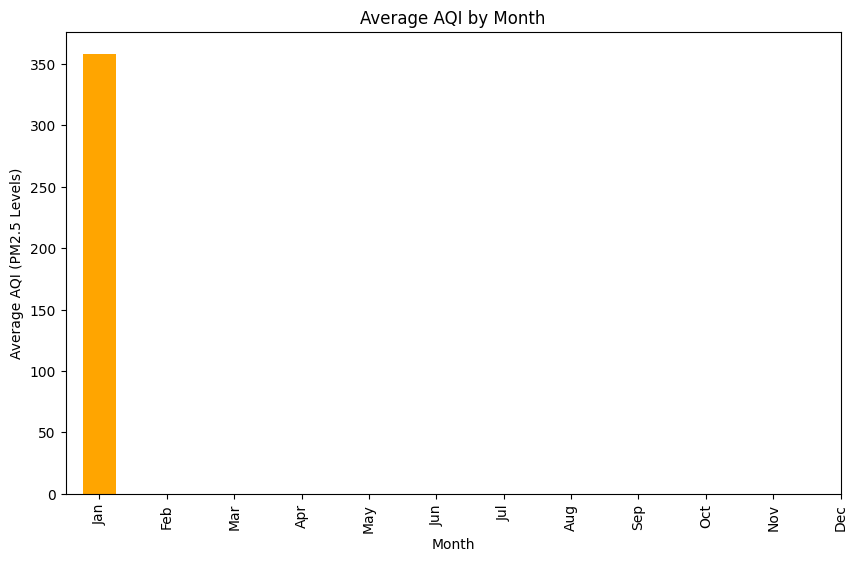

In [28]:
# Group by month and calculate average AQI
monthly_aqi = df.groupby('month')['aqi'].mean()

# Plot average AQI by month
plt.figure(figsize=(10, 6))
monthly_aqi.plot(kind='bar', color='orange')
plt.xlabel('Month')
plt.ylabel('Average AQI (PM2.5 Levels)')
plt.title('Average AQI by Month')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()